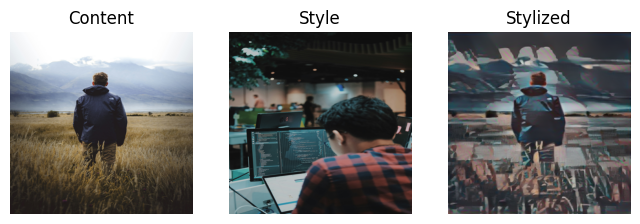

In [ ]:
# Task 5:Neural Style Transfer

import tensorflow_hub as hub
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def load_image(path, size=(400, 400)):
    img = Image.open(path).convert('RGB').resize(size)
    img = np.array(img)/255.0
    return tf.convert_to_tensor(img, dtype=tf.float32)[None, ...]

content_path = tf.keras.utils.get_file(
    'content.jpg',
    'https://images.unsplash.com/photo-1503023345310-bd7c1de61c7d'
)
style_path = tf.keras.utils.get_file(
    'style.jpg',
    'https://images.unsplash.com/photo-1549692520-acc6669e2f0c'
)

content = load_image(content_path)
style = load_image(style_path)

model = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")
stylized = model(content, style)[0]

plt.figure(figsize=(8,8))
plt.subplot(1,3,1); plt.imshow(content[0]); plt.title("Content"); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(style[0]); plt.title("Style"); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(stylized[0]); plt.title("Stylized"); plt.axis('off')
plt.show()


Upload content image:


Saving 133725343740404114.jpg to 133725343740404114 (2).jpg
Upload style image:


Saving 133832448660697565.jpg to 133832448660697565.jpg


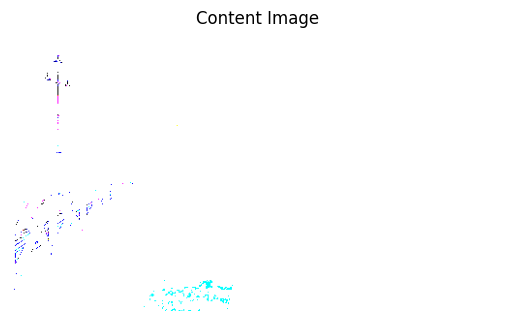

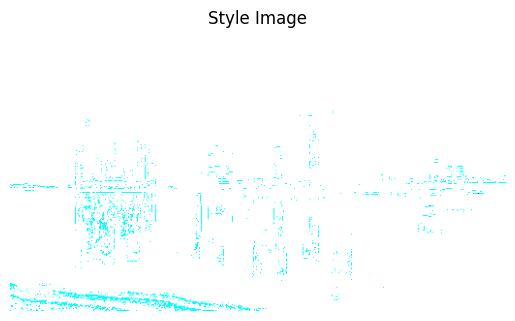

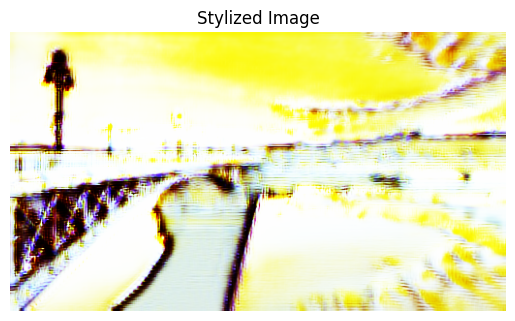

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image
import numpy as np
import io
from google.colab import files
import matplotlib.pyplot as plt

def load_image(uploaded_file, max_dim=512):
    img = Image.open(io.BytesIO(uploaded_file))
    long = max(img.size)
    scale = max_dim / long
    img = img.resize((round(img.size[0]*scale), round(img.size[1]*scale)), Image.Resampling.LANCZOS)
    img = tf.keras.utils.img_to_array(img)
    img = img[tf.newaxis, :]
    img = tf.image.convert_image_dtype(img, tf.float32)
    return img

def show_image(image, title=''):
    image = tf.squeeze(image)
    image = tf.clip_by_value(image, 0, 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(title)
    plt.show()

print("Upload content image:")
content_uploaded = files.upload()
content_image = load_image(next(iter(content_uploaded.values())))

print("Upload style image:")
style_uploaded = files.upload()
style_image = load_image(next(iter(style_uploaded.values())))

hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]

show_image(content_image, title='Content Image')
show_image(style_image, title='Style Image')
show_image(stylized_image, title='Stylized Image')

